# Summary

Best ROC-AUC (base) was 86.47% on Random Forest. With H2O, AUC is 95.58% on validation set and 85.66% on test set.
* Imported essential libraries and datasets. Unprocessed and preprocessed runs were performed
* On clean data sets, Gradient Boosting Machine (GBM) is the best performing model, with AUC at 98% on train set and 94% on validation set
* Most important features are: deposit_type_Non Refund, country_PRT, and lead_time. This aligns with the features found in the manual analysis in the `Final_Project_Notebook.ipynb`, with minor differences in teh ranking of adr (average daily rate $) and lead_time being first for the manual analysis
* Top benefits of H20: records of runs, flexibility of model selection/exclusion, UI interface and MOJO exports


# Imports

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import h2o
from h2o.automl import H2OAutoML


# Raw Data

In [3]:
df = pd.read_csv('Part 1/hotel_booking.csv')
df = df.iloc[:, 1:32]
df.shape

(119390, 31)

In [4]:
# train test split


train, test = train_test_split(df, test_size=0.4, random_state=42)
test, validation = train_test_split(test, test_size=0.5, random_state=42)

# define the target variable
target = 'is_canceled'
features = df.columns.drop(target)

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target] 
X_validation = validation[features]
y_validation = validation[target]

# H20.ai on Unprocessed data (Not used)

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama >= 0.3.8"
!pip install future
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o


In [ ]:
pip install h2o-wave

In [5]:
# initialize the h2o session
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_411"; Java(TM) SE Runtime Environment (build 1.8.0_411-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.411-b09, mixed mode)
  Starting server from /Applications/anaconda3/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/1z/nhygly957xn8kcxbbhkc_gx40000gn/T/tmp820aqg7u
  JVM stdout: /var/folders/1z/nhygly957xn8kcxbbhkc_gx40000gn/T/tmp820aqg7u/h2o_chiaralu_started_from_python.out
  JVM stderr: /var/folders/1z/nhygly957xn8kcxbbhkc_gx40000gn/T/tmp820aqg7u/h2o_chiaralu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Toronto
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 11 days
H2O_cluster_name:,H2O_from_python_chiaralu_xs9yn0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.541 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [9]:
# transform df into a compatible data format
hf_dataset = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [10]:
hf_dataset.types

{'is_canceled': 'int',
 'lead_time': 'int',
 'arrival_date_year': 'int',
 'arrival_date_month': 'enum',
 'arrival_date_week_number': 'int',
 'arrival_date_day_of_month': 'int',
 'stays_in_weekend_nights': 'int',
 'stays_in_week_nights': 'int',
 'adults': 'int',
 'children': 'int',
 'babies': 'int',
 'meal': 'enum',
 'country': 'enum',
 'market_segment': 'enum',
 'distribution_channel': 'enum',
 'is_repeated_guest': 'int',
 'previous_cancellations': 'int',
 'previous_bookings_not_canceled': 'int',
 'reserved_room_type': 'enum',
 'assigned_room_type': 'enum',
 'booking_changes': 'int',
 'deposit_type': 'enum',
 'agent': 'int',
 'company': 'enum',
 'days_in_waiting_list': 'int',
 'customer_type': 'enum',
 'adr': 'real',
 'required_car_parking_spaces': 'int',
 'total_of_special_requests': 'int',
 'reservation_status': 'enum',
 'reservation_status_date': 'time'}

In [11]:
hf_dataset.describe()

Rows:119390
Cols:31

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
type,int,int,int,enum,int,int,int,int,int,int,int,enum,enum,enum,enum,int,int,int,enum,enum,int,enum,int,enum,int,enum,real,int,int,enum,time
mins,0.0,0.0,2015.0,,1.0,1.0,0.0,0.0,0.0,0.0,0.0,,,,,0.0,0.0,0.0,,,0.0,,1.0,,0.0,,-6.38,0.0,0.0,,1413504000000.0
mean,0.37041628277075134,104.01141636652962,2016.1565541502669,,27.165172962559705,15.798241058715151,0.9275986263506132,2.500301532791692,1.856403383867997,0.10388990333874994,0.007948739425412514,,,,,0.03191222045397437,0.08711784906608591,0.13709690928888515,,,0.22112404724013748,,86.69338185346915,,2.321149174972779,,101.83112153446696,0.06251779881062071,0.5713627607002247,,1469838287883.411
maxs,1.0,737.0,2017.0,,53.0,31.0,19.0,50.0,55.0,10.0,10.0,,,,,1.0,26.0,72.0,,,21.0,,535.0,,391.0,,5400.0,8.0,5.0,,1505347200000.0
sigma,0.48291822659259837,106.86309704798794,0.7074759445196503,,13.605138355497608,8.780829470578363,0.9986134945978754,1.908285615047911,0.5792609988327545,0.39856144478644157,0.09743619130126435,,,,,0.17576714541065658,0.8443363841545108,1.4974368477076772,,,0.6523055726747717,,110.77454764295149,,17.59472087877622,,50.53579028554877,0.2452911474674938,0.7927984228094118,,19806197159.481823
zeros,75166,6345,0,,0,0,51998,7645,403,110796,118473,,,,,115580,112906,115770,,,101314,,0,,115692,,1959,111974,70318,,0
missing,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,16340,0,0,0,0,0,0,0,0
0,0.0,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,0.0,0.0,BB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,3.0,No Deposit,nan,nan,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01 00:00:00
1,0.0,737.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,0.0,0.0,BB,PRT,Direct,Direct,0.0,0.0,0.0,C,C,4.0,No Deposit,nan,nan,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01 00:00:00
2,0.0,7.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,0.0,0.0,BB,GBR,Direct,Direct,0.0,0.0,0.0,A,C,0.0,No Deposit,nan,nan,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02 00:00:00


In [12]:
train, test = hf_dataset.split_frame(ratios=[0.6],seed=1)
test, val = test.split_frame(ratios=[0.5],seed=1)

y = "is_canceled"
X = hf_dataset.columns
X.remove(y)

In [13]:
h2o_aml = H2OAutoML(max_models = 12, seed = 1, exclude_algos = ["StackedEnsemble"], verbosity="info") #max_runtime_secs=120

In [14]:
h2o_aml.train(x = X, y = y, training_frame = train)

AutoML progress: |
14:06:55.149: Project: AutoML_1_20240419_140655
14:06:55.151: 5-fold cross-validation will be used.
14:06:55.152: Setting stopping tolerance adaptively based on the training frame: 0.0037349070401143008
14:06:55.152: Build control seed: 1
14:06:55.155: training frame: Frame key: AutoML_1_20240419_140655_training_py_2_sid_9673    cols: 31    rows: 71687  chunks: 5    size: 2545188  checksum: -36710179132475560
14:06:55.156: validation frame: NULL
14:06:55.156: leaderboard frame: NULL
14:06:55.156: blending frame: NULL
14:06:55.156: response column: is_canceled
14:06:55.156: fold column: null
14:06:55.156: weights column: null
14:06:55.187: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_2_AutoML_1_20240419_140655


Model Summary: 
    number_of_trees
--  -----------------
    71

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 6.403619813898192e-07
RMSE: 0.0008002262063878058
MAE: 0.0003632552862812014
RMSLE: 0.0006695756565994769
Mean Residual Deviance: 6.403619813898192e-07

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 7.661593317608457e-11
RMSE: 8.753052791802673e-06
MAE: 4.362590899120618e-06
RMSLE: 6.1959495609489645e-06
Mean Residual Deviance: 7.661593317608457e-11

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     nan          0            nan           nan           nan           nan           nan
loglikelihood           nan          0            nan           nan           nan           nan           nan
mae                     4.36261e-06  8.20656e-07  3.60273e-06   3.5979e-06    5.2276e-06    4.16046e-06   5.22437e-06
mean_residual_deviance  7.66167e-11  2.63556e-11  5.24217e-11   4.68354e-11   9.222e-11     8.30275e-11   1.08579e-10
mse                     7.66167e-11  2.63556e-11  5.24217e-11   4.68354e-11   9.222e-11     8.30275e-11   1.08579e-10
r2                      1            0            1             1             1             1             1
residual_deviance       7.66167e-11  2.63556e-11  5.24217e-11   4.68354e-11   9.222e-11     8.30275e-11   1.08579e-10
rmse                    8.64382e-06  1.54153e-06  7.24028e-06   6.84364e-06   9.60312e-06   9.11194e-06   1.04201e-05
rmsle                   6.10687e-06  1.17064e-06  4.89432e-06   4.9652e-06    6.84142e-06   6.26221e-06   7.57119e-06

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-04-19 14:10:15  5.937 sec   0                  0.5              0.5             0.25
    2024-04-19 14:10:15  6.160 sec   5                  0.0840442        0.0840442       0.00706343
    2024-04-19 14:10:15  6.675 sec   10                 0.0171632        0.0166665       0.000294577
    2024-04-19 14:10:16  7.374 sec   15                 0.00331435       0.00289751      1.09849e-05
    2024-04-19 14:10:17  8.077 sec   20                 0.00136645       0.000724399     1.86718e-06
    2024-04-19 14:10:17  8.687 sec   25                 0.00109476       0.000452752     1.19851e-06
    2024-04-19 14:10:18  9.291 sec   30                 0.0010375        0.000428198     1.0764e-06
    2024-04-19 14:10:18  9.872 sec   35                 0.000988814      0.000417076     9.77753e-07
    2024-04-19 14:10:19  10.433 sec  40                 0.000966514      0.000411632     9.3415e-07
    2024-04-19 14:10:20  11.003 sec  45                 0.000945141      0.000406536     8.93292e-07
    2024-04-19 14:10:20  11.612 sec  50                 0.000914948      0.000399285     8.3713e-07
    2024-04-19 14:10:21  12.264 sec  55                 0.000887245      0.000392085     7.87204e-07
    2024-04-19 14:10:22  12.896 sec  60                 0.000861456      0.000383121     7.42106e-07
    2024-04-19 14:10:22  13.563 sec  65                 0.000829113      0.000373644     6.87428e-07
    2024-04-19 14:10:23  14.193 sec  70                 0.000802872      0.00036357      6.44604e-07
    2024-04-19 14:10:23  14.375 sec  71                 0.000800226      0.000363255     6.40362e-07

Variable Importances: 
variable                      relative_importance     scaled_importance       percentage
----------------------------  ----------------------  ----------------------  ----------------------
reservation_s

In [15]:
# Get the top model of leaderboard (unprocessed dataset)
se = h2o_aml.leader

h2o_lb = h2o_aml.leaderboard
h2o_lb.head(rows = h2o_lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_2_AutoML_1_20240419_140655,8.75305e-06,7.66159e-11,4.36259e-06,6.19595e-06,7.66159e-11
XGBoost_3_AutoML_1_20240419_140655,0.00031715,1.00584e-07,0.000132217,0.000263003,1.00584e-07
GLM_1_AutoML_1_20240419_140655,0.000649873,4.22335e-07,0.000457685,0.000411835,4.22335e-07
GBM_5_AutoML_1_20240419_140655,0.00163828,2.68396e-06,0.000786401,0.00139795,2.68396e-06
DRF_1_AutoML_1_20240419_140655,0.00246435,6.07303e-06,0.000228812,0.00173989,6.07303e-06
DeepLearning_1_AutoML_1_20240419_140655,0.00278499,7.75615e-06,0.00103392,0.00191296,7.75615e-06
XGBoost_1_AutoML_1_20240419_140655,0.00335322,1.12441e-05,0.000714228,0.00290893,1.12441e-05
GBM_2_AutoML_1_20240419_140655,0.00454536,2.06603e-05,0.00237536,0.0037698,2.06603e-05
GBM_3_AutoML_1_20240419_140655,0.00552653,3.05426e-05,0.00290566,0.004407,3.05426e-05
GBM_4_AutoML_1_20240419_140655,0.00763422,5.82813e-05,0.00370529,0.0060415,5.82813e-05


## H20.ai on Preprocessed data (Used)

In [15]:
import pandas as pd 

# import preprocessed data
X_train = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY 695/Group Project/hotel_cancellation_ML2/X_train_ros.csv')
y_train = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY 695/Group Project/hotel_cancellation_ML2/y_train_ros.csv')
X_test = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY 695/Group Project/hotel_cancellation_ML2/X_test_std.csv')
y_test = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY 695/Group Project/hotel_cancellation_ML2/y_test.csv')
X_val = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY 695/Group Project/hotel_cancellation_ML2/X_val_std.csv')
y_val = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY 695/Group Project/hotel_cancellation_ML2/y_val.csv')


# Initialize H2O
h2o.init()

# Initialize H2OAutoML
h2o_aml = H2OAutoML(max_models=12, seed=1, exclude_algos=["StackedEnsemble"], verbosity="info", max_runtime_secs=120)

# Concatenate X_train and y_train
frame = pd.concat([X_train, y_train], axis=1)

# Convert DataFrame to H2O Frame
train = h2o.H2OFrame(frame)

# Change data type of 'is_canceled' column in y_train
train['is_canceled'] = train['is_canceled'].asfactor()  # Convert to categorical

# Train H2OAutoML
h2o_aml.train(y='is_canceled', training_frame=train)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 18 mins
H2O_cluster_timezone:,America/Toronto
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 11 days
H2O_cluster_name:,H2O_from_python_chiaralu_xs9yn0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.675 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
20:19:01.72: Project: AutoML_7_20240424_201901
20:19:01.73: Blending will be used.
20:19:01.77: Setting stopping tolerance adaptively based on the training frame: 0.0031225310053060356
20:19:01.78: Build control seed: 1
20:19:01.80: Since cross-validation is disabled, and validation, blending frame(s) were not provided, automatically split the training data into training, validation, blending frame(s) in the ratio 70/10/20.
20:19:01.353: training frame: Frame key: AutoML_7_20240424_201901_training_py_14_sid_8539    cols: 71    rows: 71545  chunks: 24    size: 10955139  checksum: 7526113767726842177
20:19:01.361: validation frame: Frame key: AutoML_7_20240424_201901_validation_py_14_sid_8539    cols: 71    rows: 10408  chunks: 24    size: 1681071  checksum: 8735839828023336433
20:19:01.361: leaderboard frame: Frame key: AutoML_7_20240424_201901_validation_py_14_sid_8539    c

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_7_20240424_201901


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          2.0704e+06             20           20           20            2248          4203          3268.08

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.09171056197855981
RMSE: 0.3028375174554167
LogLoss: 0.295234745442453
Mean Per-Class Error: 0.1221474649597843
AUC: 0.9533377897819009
AUCPR: 0.9554411269442302
Gini: 0.9066755795638017

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4588017564192949
       0      1      Error    Rate
-----  -----  -----  -------  ----------------
0      30637  5085   0.1423   (5085.0/35722.0)
1      3652   32171  0.1019   (3652.0/35823.0)
Total  34289  37256  0.1221   (8737.0/71545.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.458802     0.880444  205
max f2                       0.324038     0.919487  259
max f0point5                 0.651123     0.89224   133
max accuracy                 0.473547     0.878161  199
max precision                0.999949     1         0
max recall                   2.17898e-05  1         399
max specificity              0.999949     1         0
max absolute_mcc             0.473547     0.756456  199
max min_per_class_accuracy   0.489771     0.877146  192
max mean_per_class_accuracy  0.473547     0.878147  199
max tns                      0.999949     35722     0
max fns                      0.999949     26224     0
max fps                      2.17898e-05  35722     399
max tps                      2.17898e-05  35823     399
max tnr                      0.999949     1         0
max fnr                      0.999949     0.732044  0
max fpr                      2.17898e-05  1         399
max tpr                      2.17898e-05  1         399

Gains/Lift Table: Avg response rate: 50.07 %, avg score: 50.79 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0774757                   1                  1.99718     1.99718            1                1          1                           1                   0.154733        0.154733                   99.7181   99.7181            0.154733
2        0.10079                     0.999977           1.99718     1.99718            1                0.999981   1                           0.999996            0.0465623       0.201295                   99.7181   99.7181            0.201295
3        0.150157                    0.996738           1.99718     1.99718            1                0.999275   1                           0.999759            0.0985959       0.299891                   99.7181   99.7181            0.299891
4        0.2                         0.921066           1.9871      1.99467            0.994952         0.969158   0.998742                    0.992132            0.0990425       0.398934                   98.7099   99.4668            0.39843
5        0.300007                    0.796963           1.87213     1.95382            0.937386         0.853493   0.978289   

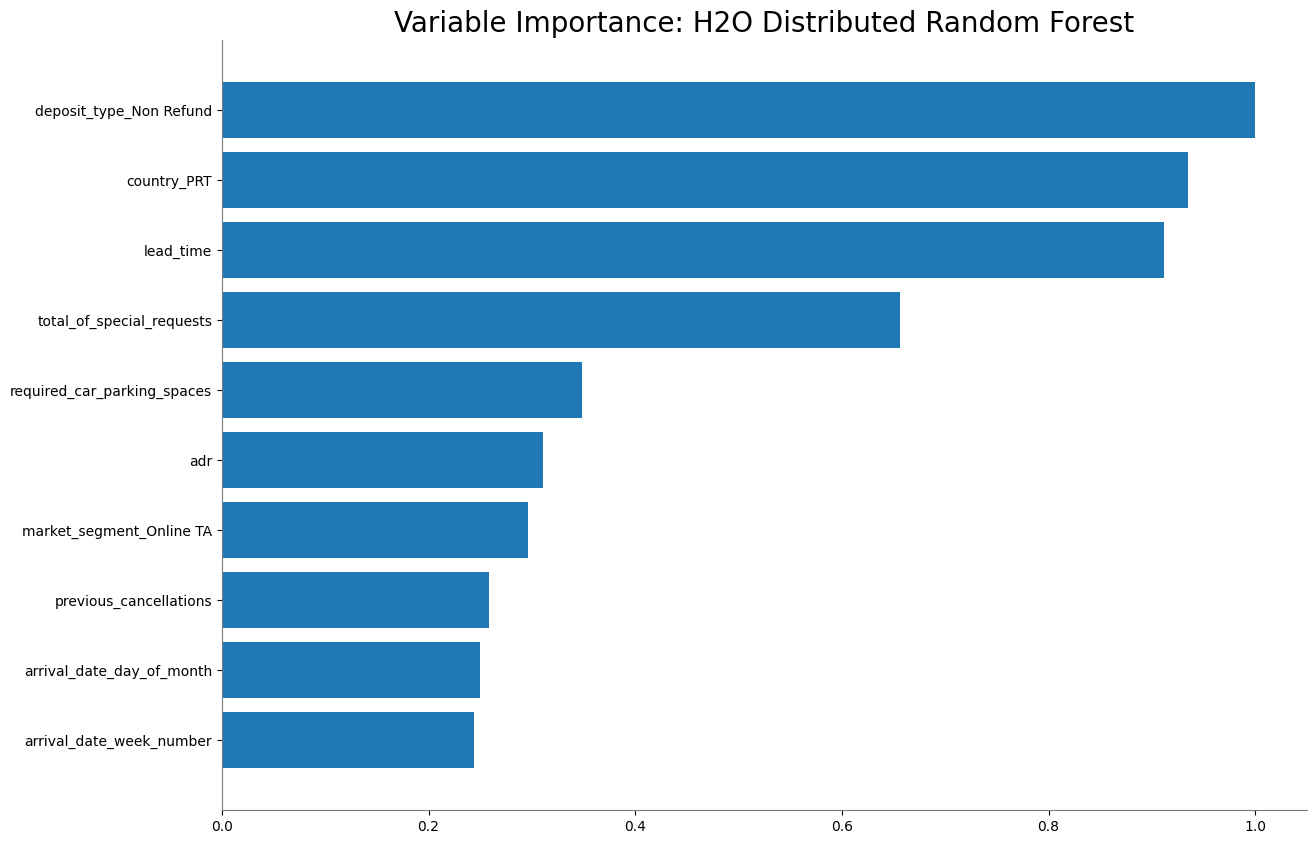

<Figure size 640x480 with 0 Axes>

In [16]:
# plot importances
h2o_aml.leader.varimp_plot()


In [17]:
se = h2o_aml.leader

h2o_lb = h2o_aml.leaderboard
h2o_lb.head(rows = h2o_lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DRF_1_AutoML_7_20240424_201901,0.9558,0.288745,0.958587,0.121211,0.299947,0.0899684
XGBoost_2_AutoML_7_20240424_201901,0.955076,0.269803,0.957625,0.120018,0.291278,0.0848428
GBM_1_AutoML_7_20240424_201901,0.953938,0.272937,0.95648,0.128317,0.294659,0.0868237
XGBoost_1_AutoML_7_20240424_201901,0.952596,0.276934,0.954854,0.120444,0.29577,0.0874799
GBM_2_AutoML_7_20240424_201901,0.941609,0.306779,0.945188,0.146111,0.314141,0.0986849
GLM_1_AutoML_7_20240424_201901,0.890504,0.409441,0.900977,0.21467,0.366928,0.134636


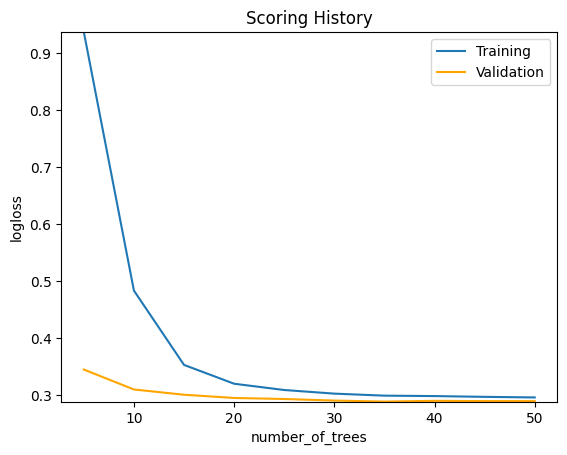

In [19]:
# plot scoring history trees and training_logloss
se.plot()


In [23]:
# run H2O on test set
predictions = h2o_aml.leader.predict(test)

# Convert predictions to pandas DataFrame
predictions_df = predictions.as_data_frame()

# print roc_auc_score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions_df['predict'])

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/Applications/anaconda3/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


0.8566541344392613

In [20]:
# save as MOJO for future loads
se.download_mojo(path = "/Users/chiaralu/Desktop/Courses/INSY 695/Group Project/hotel_cancellation_ML2/models", get_genmodel_jar = True)

'/Users/chiaralu/Desktop/Courses/INSY 695/Group Project/hotel_cancellation_ML2/models/DRF_1_AutoML_7_20240424_201901.zip'